<a href="https://colab.research.google.com/github/bandemm/cleanroomdetection/blob/master/Clean_Messy_Room_Detection_Using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
print(tf.__version__)

2.2.0


In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2020-07-30 13:10:45--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  6.06MB/s    in 13s     

2020-07-30 13:10:59 (4.99 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [ ]:
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
os.listdir('/tmp/images/train')

['messy', 'clean']

In [ ]:
os.listdir('/tmp/images/val')

['messy', 'clean']

In [ ]:
#make a neat room directory in the training data directory
train_clean_dir = os.path.join(train_dir, 'clean')
 
#make a messy room directory in the training data directory
train_messy_dir = os.path.join(train_dir, 'messy')
 
#make a neat room directory in the data validation directory
validation_clean_dir = os.path.join(validation_dir, 'clean')
 
#make a messy room directory in the training validation directory
validation_messy_dir = os.path.join(validation_dir, 'messy')

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150), #change the resolution of the entire image to 150x150 pixels
        batch_size=4,
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=4, 
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2)

Epoch 1/20
25/25 - 5s - loss: 0.7045 - accuracy: 0.4900 - val_loss: 0.6982 - val_accuracy: 0.5000
Epoch 2/20
25/25 - 5s - loss: 0.7030 - accuracy: 0.4500 - val_loss: 0.6843 - val_accuracy: 0.5000
Epoch 3/20
25/25 - 5s - loss: 0.6930 - accuracy: 0.4900 - val_loss: 0.6826 - val_accuracy: 0.6500
Epoch 4/20
25/25 - 5s - loss: 0.6713 - accuracy: 0.6200 - val_loss: 0.7209 - val_accuracy: 0.5000
Epoch 5/20
25/25 - 5s - loss: 0.6115 - accuracy: 0.6000 - val_loss: 0.7839 - val_accuracy: 0.5500
Epoch 6/20
25/25 - 5s - loss: 0.6131 - accuracy: 0.6400 - val_loss: 0.6486 - val_accuracy: 0.5500
Epoch 7/20
25/25 - 5s - loss: 0.6698 - accuracy: 0.5800 - val_loss: 0.5793 - val_accuracy: 0.5500
Epoch 8/20
25/25 - 5s - loss: 0.5797 - accuracy: 0.7100 - val_loss: 0.4765 - val_accuracy: 0.8000
Epoch 9/20
25/25 - 5s - loss: 0.5370 - accuracy: 0.7400 - val_loss: 0.4384 - val_accuracy: 0.7500
Epoch 10/20
25/25 - 5s - loss: 0.6942 - accuracy: 0.6900 - val_loss: 0.6568 - val_accuracy: 0.5000
Epoch 11/20
25/25 -

Saving RCAT-100MessyRoom.jpg to RCAT-100MessyRoom.jpg
RCAT-100MessyRoom.jpg
Dirty


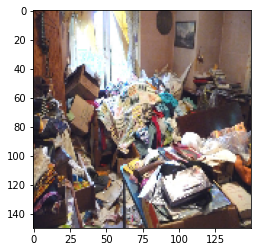

In [39]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  #predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('Clean')
  else:
    print('Dirty')